In [1]:
import dill
import pandas as pd
from tqdm import tqdm
import sys
# import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import tweepy
import numpy as np
import pyLDAvis.sklearn
import matplotlib.pyplot

import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_lg')

sys.path.append('../scripts')

import twitter
import text_analysis

andrew_yang_tweets = dill.load(open('../scrapped_data/twitter-data/yang-tweets.pkd', 'rb'))
trump_tweets = dill.load(open('../scrapped_data/twitter-data/trump_personal_tweets.pkd', 'rb'))

/home/frank/.anaconda3/lib/python3.7/site-packages/thinc/neural/train.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, SGD, linear_decay
/home/frank/.anaconda3/lib/python3.7/site-packages/thinc/check.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import defaultdict, Sequence, Sized, Iterable, Callable


In [3]:
text_yang = twitter.Tweets(andrew_yang_tweets)
text_trump = twitter.Tweets(trump_tweets)

text_yang.process_tweets_into_df()
text_yang.clean_column()

text_trump.process_tweets_into_df()
text_trump.clean_column()

df_yang = text_yang.df
df_trump = text_trump.df

100%|██████████| 3192/3192 [00:01<00:00, 2111.25it/s]


In [6]:
y = np.array([0] * len(df_yang) + [1] * len(df_trump))

In [8]:
processed_text = [text for text in df_yang['processed_text']] + [text for text in df_trump['processed_text']]

In [9]:
docs = [nlp(text) for text in processed_text]

In [10]:
X = np.array([doc.vector for doc in docs])

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)

In [13]:
X_c = pca.fit_transform(X=X)

In [ ]:
vectors_compressed[:,0]

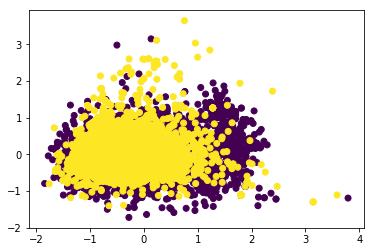

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_c[:,0], X_c[:,1], c=y)